# Probability Distribution Exercises

#### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

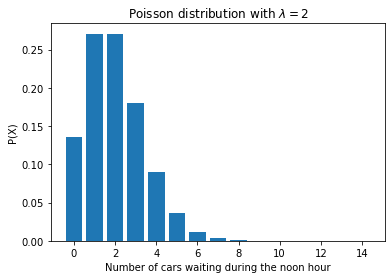

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# average rate of 2 cars during noon hour
λ = 2
# set x and y values
x = np.arange(0,15)
y = stats.poisson(λ).pmf(x)
# plot distribution
plt.bar(x,y)
# add title and axis labels
plt.xlabel('Number of cars waiting during the noon hour')
plt.ylabel('P(X)')
plt.title('Poisson distribution with $λ = 2$');

#### 1a. What is the probability that no cars drive up in the noon hour?

In [2]:
stats.poisson(λ).pmf(0)

0.1353352832366127

#### 1b. What is the probability that 3 or more cars come through the drive through?

In [3]:
stats.poisson(λ).sf(2)

0.32332358381693654

#### 1c. How likely is it that the drive through gets at least 1 car?

In [4]:
stats.poisson(λ).sf(0)

0.8646647167633873

#### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:
#### 2a. What grade point average is required to be in the top 5% of the graduating class?

In [5]:
μ = 3
σ = 0.3

grades = stats.norm(μ, σ)

grades.isf(0.05)

3.4934560880854417

#### 2b. What GPA constitutes the bottom 15% of the class?

In [6]:
grades.ppf(0.15)

2.689069983151863

#### 2c. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [7]:
print(f'The range of the third decile from the bottom of the class is {round(grades.isf(0.8), 2)} to {round(grades.isf(0.7), 2)}. \n\nA student with a 2.8 GPA would qualify for this scholarship.')

The range of the third decile from the bottom of the class is 2.75 to 2.84. 

A student with a 2.8 GPA would qualify for this scholarship.


#### 2d. If I have a GPA of 3.5, what percentile am I in?

In [9]:
round(grades.cdf(3.5), 2)
# 95th percentile

0.95

#### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [10]:
n_trials = 4326
p = 0.02

clicks = stats.binom(n_trials, p)

clicks.sf(96)

0.1397582363130086

In [13]:
# simulation method

clicks = np.random.choice([0,1], size=(10_000, 4326), p=(0.98, 0.02))
(clicks.sum(axis=1) >=97).mean()

0.1393

In [14]:
# poisson approximation method

λ = n_trials*p

stats.poisson(λ).sf(96)

0.14211867659283192

#### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question. 
#### What is the probability that at least one of your first 60 answers is correct?

In [15]:
# 100 questions all different answers from .01 to 1
# 1/100 = 1% chance of getting correct answer
n_trials = 60
p = 0.01

answers = stats.binom(n_trials, p)

answers.sf(0)

0.4528433576092388

In [18]:
# simulation method

(np.random.choice([0,1], size=(100_000, 60), p=(0.99,0.01)).sum(axis=1)>0).mean()

0.45015

#### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

Text(0.5, 0, 'Number of cleanings per day')

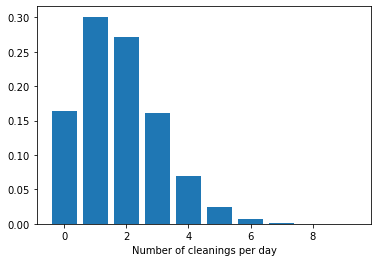

In [21]:
n_trials = (0.9*3*22)
p = 0.03
cleaned_area = stats.binom(n_trials, p)

x = np.arange(0,10)
y = cleaned_area.pmf(x)
plt.bar(x,y)
plt.xlabel('Number of cleanings per day')

In [20]:
# each day's probability of break area being cleaned
cleaned_area.sf(0)

0.8342199288437355

In [22]:
# probability of break area not being cleaned for 2 days
# twice as many students visit break area (double the trials)
stats.binom(n_trials*2, p).pmf(0)

0.026821436301629073

In [23]:
# probability of break area not being cleaned all week
# workweek = 5 days
# multiply trials by 5
stats.binom(n_trials*5, p).pmf(0)

0.00011781621791055144

#### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

Text(0, 0.5, 'P(X)')

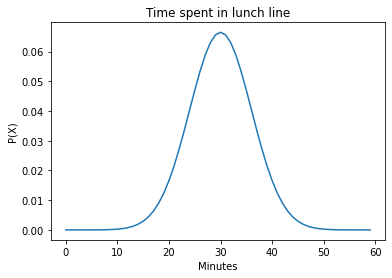

In [24]:
# multiplied μ and σ by 2 because we need time values and each person takes 2 minutes to order
μ = 15*2 # minutes
σ = 3*2 # minutes

lunch_line = stats.norm(μ, σ)

x = np.arange(0,60)
y = lunch_line.pdf(x)
plt.plot(x,y)
plt.title('Time spent in lunch line')
plt.xlabel('Minutes')
plt.ylabel('P(X)')

In [27]:
# 60 mins for lunch
# 15 to eat, 10 waiting for food, 2 to order
# Probability of spending 33 mins or less in line

print(f'The probability of having at least 15 minutes to eat lunch is {lunch_line.cdf(33)}.')

The probability of having at least 15 minutes to eat lunch is 0.6914624612740131.


In [26]:
# simulation method
(np.random.normal(30, 6, 100_000) <=33).mean()

0.69364

#### 7. Connect to the `employees` database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [28]:
def get_db_url(db_name):
    from env import user, host, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

In [29]:
url = get_db_url('employees')
sql = '''
SELECT AVG(salary), STDDEV(salary)
FROM salaries
WHERE to_date > CURDATE();
'''

df = pd.read_sql(sql,url)
df

,AVG(salary),STDDEV(salary)
0,72012.2359,17309.959336


In [30]:
sql = '''
SELECT *
FROM salaries
WHERE to_date > CURDATE();
'''

salaries_df = pd.read_sql(sql,url)
salaries_df

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


#### 7a. What percent of employees earn less than 60,000?

In [31]:
μ = 72012.2359
σ = 17309.959336

earnings = stats.norm(μ, σ)

earnings.cdf(60000)

0.24385697091580277

#### 7b. What percent of employees earn more than 95,000?

In [32]:
earnings.sf(95000)

0.09208773564485367

#### 7c. What percent of employees earn between 65,000 and 80,000?

In [33]:
over65k = earnings.sf(65000)
over80k = earnings.sf(80000)
over65k-over80k

0.3350612231946799

In [35]:
# using np.diff()
np.diff(stats.norm(μ, σ).cdf([65000,80000]))

array([0.33506122])

#### 7d. What do the top 5% of employees make?

In [36]:
earnings.isf(0.05)

100484.5852962021